# ケーススタディ：アパレル店舗の商品データ分析

あなたはアパレル店舗のオーナーです。
店内に蓄積されている商品データを機械学習によって分析しようとしましたが、いざ分析を始めようとしたら､いくつかの欠損値や文字列で記録され
ており､すぐに機械学習による分析にかけることができませんでした｡
そこで､まずは前処理を行うことにしました｡

さて、Pandasを駆使して実行していきましょう！

# 【問題1 EC_shop.csvデータの読み込み】

In [9]:
import pandas as pd
import math
# index_col=0 オプションを用いて、『 Unnamed: 0 』をスキップしてください。
df = pd.read_csv("./EC_shop.csv", index_col=0)
df.head()

,DATE,NECK,BODY,SIZE,COLOR,GENDER
0,20190801,41.0,84.0,L,BL,M
1,20190801,NaN,92.0,XL,RD,W
2,20190802,38.0,NaN,L,Y,W
3,20190802,46.0,90.0,XL,GR,W
4,20190803,NaN,NaN,M,GR,M


# 【問題2 マッピング処理（シャツ）】

In [10]:
# シャツのサイズと整数を対応させる辞書を生成
size_mapping = {"S":1, "M":2, "L":3, "XL":4}
# マッピングの実行
df['SIZE'] = df["SIZE"].map(size_mapping)
df['SIZE']

0    3
1    4
2    3
3    4
4    2
5    1
6    2
7    3
8    3
9    4
Name: SIZE, dtype: int64

# 【問題3 マッピング処理（性別）】

In [11]:
# クラスラベルと整数を対応させるディクショナリを生成
gender_mapping = {"M":0, "W":1}

# マッピングの実行
df['GENDER'] = df['GENDER'].map(gender_mapping)
df['GENDER']

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    0
Name: GENDER, dtype: int64

# 【問題4 pandasでone-hotエンコーディングを使い、ダミー変数を作成】

In [12]:
# pandasでone-hotエンコーディングを使い、ダミー変数を作成
#one-hotエンコーディングしたいカラムをそのまま渡してあげればOK
color_dumy = pd.get_dummies(df['COLOR'])
color_dumy

,BL,GR,RD,Y
0,1,0,0,0
1,0,0,1,0
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0
5,0,0,1,0
6,1,0,0,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


# 【問題5 color_dumyの確認】

In [16]:
color_dumy.head(3)

,BL,GR,RD,Y
0,1,0,0,0
1,0,0,1,0
2,0,0,0,1


# 【問題6 データの結合】

pandasのconcat()を利用します。

In [17]:
df = pd.concat([df, color_dumy], axis=1)

# 【問題7 データが結合されたか確認】


In [18]:
df

,DATE,NECK,BODY,SIZE,COLOR,GENDER,BL,GR,RD,Y
0,20190801,41.0,84.0,3,BL,0,1,0,0,0
1,20190801,NaN,92.0,4,RD,1,0,0,1,0
2,20190802,38.0,NaN,3,Y,1,0,0,0,1
3,20190802,46.0,90.0,4,GR,1,0,1,0,0
4,20190803,NaN,NaN,2,GR,0,0,1,0,0
5,20190803,37.0,64.0,1,RD,0,0,0,1,0
6,20190803,NaN,78.0,2,BL,0,1,0,0,0
7,20190805,38.0,74.0,3,Y,0,0,0,0,1
8,20190805,NaN,82.0,3,BL,1,1,0,0,0
9,20190805,42.0,86.0,4,GR,0,0,1,0,0


# 【問題8 COLORカラムの削除】

drop()を利用

In [20]:
df.drop(["COLOR"], axis=1, inplace=True)

KeyError: "['COLOR'] not found in axis"

In [22]:
df.head()

,DATE,NECK,BODY,SIZE,GENDER,BL,GR,RD,Y
0,20190801,41.0,84.0,3,0,1,0,0,0
1,20190801,NaN,92.0,4,1,0,0,1,0
2,20190802,38.0,NaN,3,1,0,0,0,1
3,20190802,46.0,90.0,4,1,0,1,0,0
4,20190803,NaN,NaN,2,0,0,1,0,0


# 【問題9 NECKカラムを平均値でうめる】

fillna()を利用

In [23]:
df["NECK"] = df["NECK"].fillna(math.floor(df["NECK"].mean()))

# 【問題10 BODYカラムを平均値でうめる】

fillna()を利用

In [24]:
df["BODY"] = df["BODY"].fillna(math.floor(df["BODY"].mean()))

# 【問題11 データフレームが数値化されたか確認】

In [25]:
df

,DATE,NECK,BODY,SIZE,GENDER,BL,GR,RD,Y
0,20190801,41.0,84.0,3,0,1,0,0,0
1,20190801,40.0,92.0,4,1,0,0,1,0
2,20190802,38.0,81.0,3,1,0,0,0,1
3,20190802,46.0,90.0,4,1,0,1,0,0
4,20190803,40.0,81.0,2,0,0,1,0,0
5,20190803,37.0,64.0,1,0,0,0,1,0
6,20190803,40.0,78.0,2,0,1,0,0,0
7,20190805,38.0,74.0,3,0,0,0,0,1
8,20190805,40.0,82.0,3,1,1,0,0,0
9,20190805,42.0,86.0,4,0,0,1,0,0


# 以上です！お疲れ様でした！

# 【余力がある方】　
# ロジスティック回帰モデルで男性か女性を予測するモデルを作ってみてください

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [33]:
X = df.drop(["DATE","GENDER"], axis=1)
X.head()

,NECK,BODY,SIZE,BL,GR,RD,Y
0,41.0,84.0,3,1,0,0,0
1,40.0,92.0,4,0,0,1,0
2,38.0,81.0,3,0,0,0,1
3,46.0,90.0,4,0,1,0,0
4,40.0,81.0,2,0,1,0,0


In [32]:
y = df["GENDER"]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: GENDER, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [35]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

8
2
8
2


In [36]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [38]:
pred = model.predict(x_test)
pred

array([1, 0])

In [39]:
accuracy_score(y_test, pred)

0.5

In [40]:
cm = confusion_matrix(y_test, pred)
cm

array([[1, 1],
       [0, 0]])

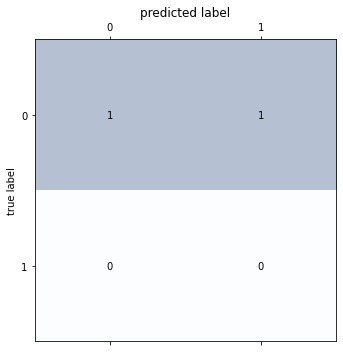

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.title('predicted label')
plt.ylabel('true label')
plt.tight_layout() # ラベルが重ならないように自動調整
plt.show()